<center><h2>Universidad Pólitecnica Salesiana</h2></center>
<center><h6>Angel Jadan</h6></center>
<center><h6>Simulación</h6></center>
<center><h5>Tema:</h5><h6>Predicción de tendencia de twiter, con python</h6></center>

In [1]:
import tweepy
import json, csv, sys
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

consumer_key = "rF0agXMR0fUu58HGg75OZGeRQ"
consumer_secret = "VpduZzn2ZufMjGrPhKQhzOnpzrfw47LdJjuk7IG9nbubTNuTkL"
access_token = "309077981-FEp6yFVY9uTimDwCYxcoLamgCuQ7bFTapYk7lLne"
access_token_secret = "tVacsM1EndkpyKy9gDnkskxtK2s3PKH6sCRi4XH7qmAeZ"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#Obtner datos de mi usuario
#data = api.me()

#print(json.dumps(data._json, indent=2))

In [2]:
"""data = api.get_user("@LassoGuillermo")
#print(json.dumps(data._json, indent=3))
item = json.loads(json.dumps(data._json, indent=3))
print(item)
for i in item:
    print(i)
print("**********")
status = item["status"]
retweets = status["retweet_count"]
likes = status["favorite_count"]

print("Retweets ",retweets)
print("Likes ",likes)"""

'data = api.get_user("@LassoGuillermo")\n#print(json.dumps(data._json, indent=3))\nitem = json.loads(json.dumps(data._json, indent=3))\nprint(item)\nfor i in item:\n    print(i)\nprint("**********")\nstatus = item["status"]\nretweets = status["retweet_count"]\nlikes = status["favorite_count"]\n\nprint("Retweets ",retweets)\nprint("Likes ",likes)'

In [4]:
c = 0
ids= []
rets=[]
for tweet in tweepy.Cursor(api.search, q="@LassoGuillermo").items(1000):
    c+=1
    #Para mostrar todos los datos
    item = json.loads(json.dumps(tweet._json, indent=1))
    #print(c)
    #print('id',item["id"])
    ret = item["retweet_count"]
    #print('Retweet',ret)
    entitie = item["entities"]
    hast = entitie["hashtags"]
    ids.append(c)
    rets.append(ret)
    
    #print("Hashtags=> ",hast)
    #print("*\n")
    #print(item)
    #user = item['user']
    #print("Usuario-> ",user)
    
    #print("*****************************************")
print('ids',ids)
print('N° ',c)
print('Retweets',rets)

ids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

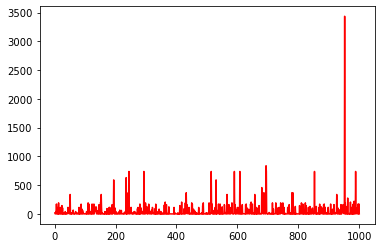

In [5]:
y=ids
x=rets
plt.plot(y, x, color="red")

In [6]:
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [7]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [0.14422821]
Independent term: 
 493.9464144581038


In [8]:
n = 1500
y_prediccion = regr.predict([[n]])
pred = int(y_prediccion)
print(pred)

710


In [30]:

#print('y',y)
#print('x',x)
x_real = np.array(range(1000, 1500))
#print(x_real)
print(len(x_real))
print('\n')

x_reg=x_real
#print('x_reg',x_reg)



500




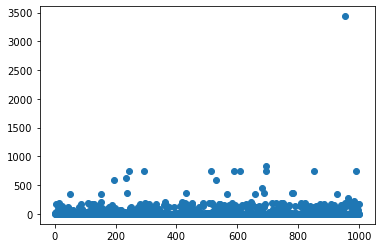

In [31]:
plt.scatter(y,x)
#plt.plot((x_real, regr.predict(x_real.reshape(-1, 1))), color='green')
plt.show()

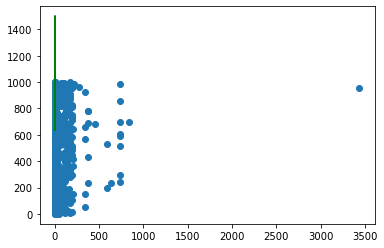

In [32]:
plt.scatter(x,y)
plt.plot((x_real, regr.predict(x_real.reshape(-1,1))), color='green')
plt.show()